36.0
36
0.0
6.283185307179586


NameError: name 'theta_2_main_ini' is not defined

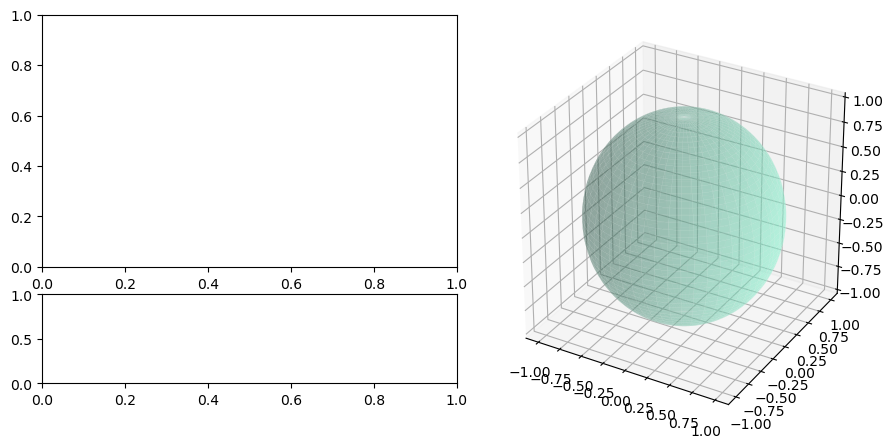

(-1.1, 1.1, -1.1, 1.1)

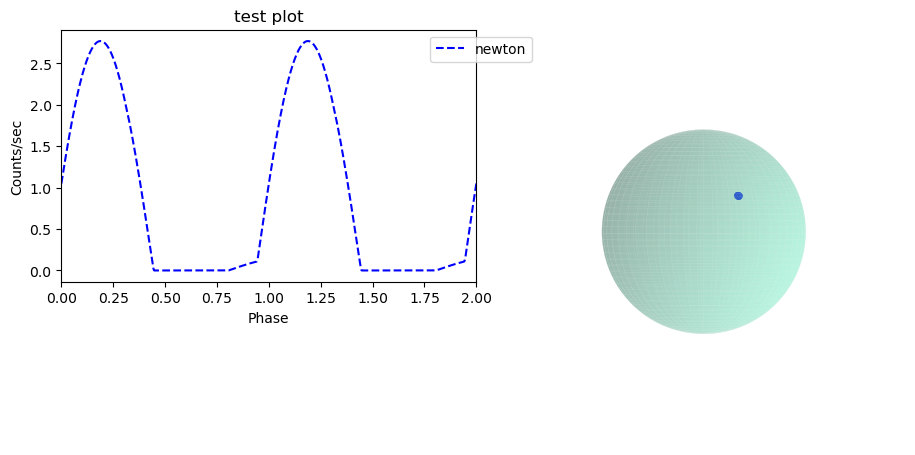

In [7]:
# single peak, finite point
# 5/8 fix note: .append to [] + []

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import scipy.stats
import os
import matplotlib
from mpl_toolkits.mplot3d import axes3d, Axes3D
import random

# geometric figure
# Create a new figure
fig = plt.figure(figsize = (12.0, 6.0), dpi = 100)
ax2 = plt.subplot2grid((20, 11), (2, 5), rowspan = 18, colspan = 5, projection = "3d")
ax1 = plt.subplot2grid((20, 11), (2, 0), rowspan = 11, colspan = 5)
# Get the current axes, and tell Matplotlib to use the 3D projection

# Set the scaling factor for the sphere
scale = 1.0

# Create a sphere
r = 1 # radius
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x_sphere = r * np.sin(phi_sphere) * np.cos(theta_sphere)
y_sphere = r * np.sin(phi_sphere) * np.sin(theta_sphere)
z_sphere = r * np.cos(phi_sphere)

# Plot the sphere
ax2.plot_surface(x_sphere, y_sphere, z_sphere, alpha = 0.3, color = "aquamarine", edgecolor = "w", linewidth = 0.1)

# initial parameter setting
inc = np.radians(90)
# HS1
theta = np.radians(70)
phi = np.radians(20)
m = 1
ang_sub = np.radians(1)
# print(ang_sub)

# sub_hot_spot_number
N_sub = 20

# print(360 / N_sub)
# print(int(360 / N_sub))
# print(360 / N_sub - int(360 / N_sub))

pi_times_2 = 2. * math.pi
# print(pi_times_2)

#############################################################################################
# functions
# Newton
def mu(x, inc, theta, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(pi_times_2 * x - phi) + np.cos(theta) * np.cos(inc)
    F = m * y
    result = (abs(F) + F) / 2
    return result

def rectangular_to_polar_theta(z):
    theta_polar = np.arccos(z / (r * scale))
    return theta_polar

def rectangular_to_polar_phi(x, y):
    if x==0:
        if y>=0:
            phi_polar = np.radians(90)
        else:
            phi_polar = np.radians(270)
    else:
        phi_polar = np.arctan(y / x)
    return phi_polar

def polar_to_rectangular_x(theta, phi):
    x_rectangular = scale * r * np.sin(theta) * np.cos(phi)
    return x_rectangular

def polar_to_rectangular_y(theta, phi):
    y_rectangular = scale * r * np.sin(theta) * np.sin(phi)
    return y_rectangular

def polar_to_rectangular_z(theta):
    z_rectangular = scale * r * np.cos(theta)
    return z_rectangular

def rotation_matrix(theta, phi, x, y, z):
    xyz = np.array([[x], [y], [z]])
    z_rot = np.array([[np.cos(-phi), np.sin(-phi), 0], [-np.sin(-phi), np.cos(-phi), 0], [0, 0 ,1]])
    y_rot = np.array([[np.cos(-theta), 0, -np.sin(-theta)], [0, 1, 0], [np.sin(-theta), 0, np.cos(-theta)]])
    XYZ_after_rotation = np.dot(z_rot, np.dot(y_rot, xyz))
    return XYZ_after_rotation

def sub_hot_spot_hs(N_sub, ang, theta, phi):
    delta_phi = 360 / N_sub
    temp_phi = 0
    x_hs_sub = np.empty(0)
    y_hs_sub = np.empty(0)
    z_hs_sub = np.empty(0)
    for i in range(0, N_sub):
        x_hs_sub = np.append(x_hs_sub, polar_to_rectangular_x(ang, np.radians(temp_phi)))
        y_hs_sub = np.append(y_hs_sub, polar_to_rectangular_y(ang, np.radians(temp_phi)))
        z_hs_sub = np.append(z_hs_sub, polar_to_rectangular_z(ang))
#         x_hs_sub = x_hs_sub + [polar_to_rectangular_x(ang, np.radians(i * 360 / N_sub))]
#         y_hs_sub = y_hs_sub + [polar_to_rectangular_y(ang, np.radians(i * 360 / N_sub))]
#         z_hs_sub = z_hs_sub + [polar_to_rectangular_z(ang)]
        temp_phi += delta_phi
#     print("x_sub_ini", x_hs_sub)
#     print("y_sub_ini", y_hs_sub)
#     print("z_sub_ini", z_hs_sub)
    hs_sub_XYZ = np.empty((3, 1))
    for i in range(0, N_sub):
        hs_sub_XYZ = np.append(hs_sub_XYZ, rotation_matrix(theta, phi, x_hs_sub[i], y_hs_sub[i], z_hs_sub[i]), axis = 1)
#         hs_sub_XYZ = hs_sub_XYZ + [rotation_matrix(theta, phi, x_hs_sub[i], y_hs_sub[i], z_hs_sub[i])] # potential error
    hs_sub_theta = np.empty(0)
    hs_sub_phi = np.empty(0)
    for i in range(0, N_sub):
        hs_sub_theta = np.append(hs_sub_theta, rectangular_to_polar_theta(hs_sub_XYZ[2, i]))
        hs_sub_phi = np.append(hs_sub_phi, rectangular_to_polar_phi(hs_sub_XYZ[1, i], hs_sub_XYZ[0, i]))
#         hs_sub_theta = hs_sub_theta + [rectangular_to_polar_theta(hs_sub_XYZ[2, i])]
#         hs_sub_phi = hs_sub_phi + [rectangular_to_polar_phi(hs_sub_XYZ[1, i], hs_sub_XYZ[0, i])]
    return hs_sub_XYZ, hs_sub_theta, hs_sub_phi

#############################################################################################

def HS(x, inc, theta, phi, m, ang_sub):
    # HS sub
    hs_sub_XYZ, hs_sub_theta, hs_sub_phi = sub_hot_spot_hs(N_sub, ang_sub, theta, phi)
#     print("hs_sub_XYZ_final", hs_sub_XYZ)
#     print("hs_sub_theta_final", hs_sub_theta)
#     print("hs_sub_phi_final", hs_sub_phi)
    HS = mu(x, inc, theta, phi, m)
    for i in range(0, N_sub):
        HS += mu(x, inc, hs_sub_theta[i], hs_sub_phi[i], m)
    return HS

#############################################################################################

def drawing_sub_hs(a111, b111, c111, d111):
    x_draw = np.empty(0)
    y_draw = np.empty(0)
    z_draw = np.empty(0)
    for i in range(0, b111):
#         x_draw_temp = [polar_to_rectangular_x(ang_sub, np.radians(i * 360 / N_sub))]
#         print(x_draw_temp)
#         x_draw = x_draw + x_draw_temp
#         y_draw = y_draw + [polar_to_rectangular_y(ang_sub, np.radians(i * 360 / N_sub))]
#         z_draw = z_draw + [polar_to_rectangular_z(ang_sub)]
        x_draw = np.append(x_draw, polar_to_rectangular_x(a111, np.radians(i * 360 / b111)))
        y_draw = np.append(y_draw, polar_to_rectangular_y(a111, np.radians(i * 360 / b111)))
        z_draw = np.append(z_draw, polar_to_rectangular_z(a111))
#     print(x_draw)
    hs_sub_draw = np.empty((3, 1))
    for i in range(0, b111):
        hs_sub_draw = np.append(hs_sub_draw, rotation_matrix(c111, d111, x_draw[i], y_draw[i], z_draw[i]), axis = 1)
#         hs_sub_draw = hs_sub_draw + [rotation_matrix(theta, phi, x_draw[i], y_draw[i], z_draw[i])] # potential error
    return hs_sub_draw

#############################################################################################

hs_sub_draw_global = drawing_sub_hs(ang_sub, N_sub, theta, phi)

# print(hs_sub_draw)
x_hs = scale * r * np.sin(theta) * np.cos(phi)
y_hs = scale * r * np.sin(theta) * np.sin(phi)
z_hs = scale * r * np.cos(theta)

ax2.scatter(x_hs, y_hs, z_hs, s = 5, c = "blue")

for i in range(0, N_sub):
    ax2.scatter(hs_sub_draw_global[0, i+1], hs_sub_draw_global[1, i+1], hs_sub_draw_global[2, i+1], zorder = 3, s = 5, c = "blue")
    
x_linspace = np.linspace(0, 2, 5000)

# initial parameter setting

hs_sub_XYZ_global, hs_sub_theta_global, hs_sub_phi_global = sub_hot_spot_hs(N_sub, ang_sub, theta, phi)
# print(hs_sub_theta)
# print(hs_sub_phi)

count_rates = HS(x_linspace, inc, theta, phi, m, ang_sub)

ax1.plot(x_linspace, count_rates, label = "newton", linestyle = '--', color = "blue")
# ax1.plot(x, y_fitting, label = 'total', color = 'red')
ax1.set_xlim(0, 2)
ax1.set_xlabel('Phase')
ax1.set_ylabel('Counts/sec')
ax1.legend(bbox_to_anchor = (1.15, 1), loc = "upper right")
ax1.set_title("test plot")

ax2.set_xlim(-1.1, 1.1)
ax2.set_ylim(-1.1, 1.1)
ax2.set_zlim(-1.1, 1.1)
ax2.view_init(elev = 90 - np.degrees(inc), azim = 0)
ax2.axis("off")

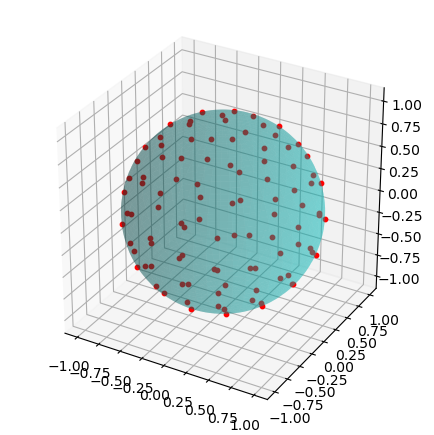

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def fibonacci_sphere(samples=1, randomize=True):
    rnd = 1.
    if randomize:
        rnd = np.random.random() * samples

    points = []
    offset = 2. / samples
    increment = np.pi * (3. - np.sqrt(5.))

    for i in range(samples):
        y = ((i * offset) - 1) + (offset / 2)
        r = np.sqrt(1 - pow(y, 2))

        phi = ((i + rnd) % samples) * increment

        x = np.cos(phi) * r
        z = np.sin(phi) * r

        points.append([x, y, z])

    return points

# Use the fibonacci_sphere function to generate the points
num_points = 100
points = fibonacci_sphere(samples=num_points)

# Use the existing code to create the sphere
fig = plt.figure(figsize=(12.0, 6.0), dpi=100)
ax2 = plt.subplot2grid((20, 11), (2, 5), rowspan=18, colspan=5, projection="3d")

scale = 1.0
r = 1
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x_sphere = r * np.sin(phi_sphere) * np.cos(theta_sphere)
y_sphere = r * np.sin(phi_sphere) * np.sin(theta_sphere)
z_sphere = r * np.cos(phi_sphere)

# Plot the sphere
ax2.plot_surface(x_sphere, y_sphere, z_sphere, color="c", alpha=0.3)

# Plot the points on the sphere
for point in points:
    ax2.scatter(*point, color="r", s=10)

plt.show()

[[0.90767337 0.89709091 0.88480238 0.87201069 0.85996797 0.84985304
  0.84265602 0.83908141 0.83947912 0.84381022 0.85165074 0.8622332
  0.87452173 0.88731342 0.89935615 0.90947108 0.91666809 0.9202427
  0.91984499 0.91551389]
 [0.33036609 0.35517547 0.37655835 0.39242162 0.40121248 0.40207041
  0.39491144 0.38043634 0.36006203 0.33578288 0.30997552 0.28516614
  0.26378326 0.24791999 0.23912913 0.2382712  0.24543016 0.25990527
  0.28027958 0.30455873]
 [0.25881905 0.2628275  0.27446048 0.29257927 0.31541028 0.34071865
  0.36602702 0.38885804 0.40697683 0.41860981 0.42261826 0.41860981
  0.40697683 0.38885804 0.36602702 0.34071865 0.31541028 0.29257927
  0.27446048 0.2628275 ]]
[ 4.96478554  6.26755096  7.64216132  9.13660962 10.88430096 12.49356573
 14.00936675 15.29975181 16.34395813 17.12518406 17.63085935 17.85284753
 17.7875767  17.43609711 16.80406418 15.90164757 14.7433675  13.34786113
 11.73758268  9.97522694  8.45854288  7.04271114  5.68414758  4.45398206
  3.30629053  2.242330

(-1.1, 1.1, -1.1, 1.1)

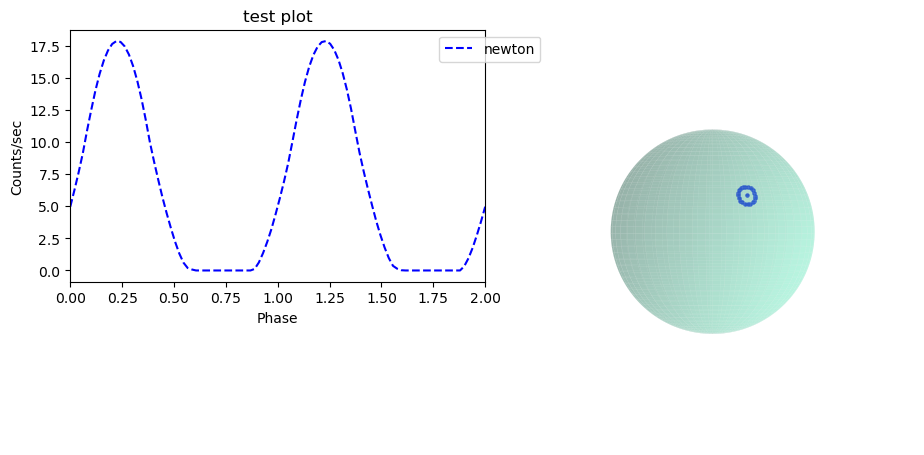

In [19]:
# single peak, finite point
# 5/8 fix note: .append to [] + [] but it doesn't work ;;

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import scipy.stats
import os
import matplotlib
from mpl_toolkits.mplot3d import axes3d, Axes3D
import random

# geometric figure
# Create a new figure
fig = plt.figure(figsize = (12.0, 6.0), dpi = 100)
ax2 = plt.subplot2grid((20, 11), (2, 5), rowspan = 18, colspan = 5, projection = "3d")
ax1 = plt.subplot2grid((20, 11), (2, 0), rowspan = 11, colspan = 5)
# Get the current axes, and tell Matplotlib to use the 3D projection

# Set the scaling factor for the sphere
scale = 1.0

# Create a sphere
r = 1 # radius
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x_sphere = r * np.sin(phi_sphere) * np.cos(theta_sphere)
y_sphere = r * np.sin(phi_sphere) * np.sin(theta_sphere)
z_sphere = r * np.cos(phi_sphere)

# Plot the sphere
ax2.plot_surface(x_sphere, y_sphere, z_sphere, alpha = 0.3, color = "aquamarine", edgecolor = "w", linewidth = 0.1)

# initial parameter setting
inc_ini = np.radians(90)
# HS1
theta_ini = np.radians(70)
phi_ini = np.radians(20)
m_ini = 1
ang_sub_ini = np.radians(5)

N_sub_ini = 20

#############################################################################################
# functions
# Newton
# def mu(x, inc, theta, phi, m):
#     pi_times_2 = 2. * math.pi
#     y = np.sin(theta) * np.sin(i) * np.cos(pi_times_2 * x - phi) + np.cos(theta) * np.cos(inc)
#     F = m * y
#     result = (abs(F) + F) / 2
#     return result
def mu(x, inc, theta, phi, m):
    pi_times_2 = 2. * math.pi
    y = np.sin(theta) * np.sin(inc) * np.cos(pi_times_2 * (x - phi)) + np.cos(theta) * np.cos(inc)
    F = m * y
    result = (abs(F) + F) / 2
    return result

def rectangular_to_polar_theta(z):
    theta_polar = np.arccos(z / (r * scale))
    return theta_polar

def rectangular_to_polar_phi(x, y):
    phi_polar = np.arctan2(y, x)
    if phi_polar < 0:
        phi_polar += 2 * np.pi
    return phi_polar

def polar_to_rectangular_x(theta, phi):
    x_rectangular = scale * r * np.sin(theta) * np.cos(phi)
    return x_rectangular

def polar_to_rectangular_y(theta, phi):
    y_rectangular = scale * r * np.sin(theta) * np.sin(phi)
    return y_rectangular

def polar_to_rectangular_z(theta):
    z_rectangular = scale * r * np.cos(theta)
    return z_rectangular

def rotation_matrix(theta, phi, x, y, z):
    xyz = np.array([[x], [y], [z]])
    z_rot = np.array([[np.cos(-phi), np.sin(-phi), 0], [-np.sin(-phi), np.cos(-phi), 0], [0, 0 ,1]])
    y_rot = np.array([[np.cos(-theta), 0, -np.sin(-theta)], [0, 1, 0], [np.sin(-theta), 0, np.cos(-theta)]])
    XYZ_after_rotation = np.dot(z_rot, np.dot(y_rot, xyz))
    return XYZ_after_rotation

def sub_hot_spot_hs(N_sub, ang, theta, phi):
    delta_phi = 360 / N_sub
    temp_phi = 0
    x_hs_sub = np.empty(0)
    y_hs_sub = np.empty(0)
    z_hs_sub = np.empty(0)
    for i in range(0, N_sub):
        x_hs_sub = np.append(x_hs_sub, polar_to_rectangular_x(ang, np.radians(temp_phi)))
        y_hs_sub = np.append(y_hs_sub, polar_to_rectangular_y(ang, np.radians(temp_phi)))
        z_hs_sub = np.append(z_hs_sub, polar_to_rectangular_z(ang))
        temp_phi += delta_phi
    hs_sub_XYZ = np.empty((3, 0))
    for i in range(0, N_sub):
        hs_sub_XYZ = np.append(hs_sub_XYZ, rotation_matrix(theta, phi, x_hs_sub[i], y_hs_sub[i], z_hs_sub[i]), axis = 1)
    hs_sub_theta = np.empty(0)
    hs_sub_phi = np.empty(0)
    for i in range(0, N_sub):
        hs_sub_theta = np.append(hs_sub_theta, rectangular_to_polar_theta(hs_sub_XYZ[2, i]))
        hs_sub_phi = np.append(hs_sub_phi, rectangular_to_polar_phi(hs_sub_XYZ[1, i], hs_sub_XYZ[0, i]))
    return hs_sub_XYZ, hs_sub_theta, hs_sub_phi

#############################################################################################

def HS(x, inc, theta, phi, m, ang_sub):
    # HS sub
    hs_sub_XYZ_final, hs_sub_theta_final, hs_sub_phi_final = sub_hot_spot_hs(N_sub_ini, ang_sub, theta, phi)
    HS = mu(x, inc, theta, phi, m)
    for i in range(0, N_sub_ini):
        HS += mu(x, inc, hs_sub_theta_final[i], hs_sub_phi_final[i], m)
    return HS

#############################################################################################

def drawing_sub_hs(a111, b111, c111, d111):
    x_draw = np.empty(0)
    y_draw = np.empty(0)
    z_draw = np.empty(0)
    for i in range(0, b111):
        x_draw = np.append(x_draw, polar_to_rectangular_x(a111, np.radians(i * 360 / b111)))
        y_draw = np.append(y_draw, polar_to_rectangular_y(a111, np.radians(i * 360 / b111)))
        z_draw = np.append(z_draw, polar_to_rectangular_z(a111))
    hs_sub_draw = np.empty((3, 0))
    for i in range(0, b111):
        hs_sub_draw = np.append(hs_sub_draw, rotation_matrix(c111, d111, x_draw[i], y_draw[i], z_draw[i]), axis = 1)
    return hs_sub_draw

#############################################################################################

hs_sub_draw_global = drawing_sub_hs(ang_sub_ini, N_sub_ini, theta_ini, phi_ini)

print(hs_sub_draw_global)
x_hs = scale * r * np.sin(theta_ini) * np.cos(phi_ini)
y_hs = scale * r * np.sin(theta_ini) * np.sin(phi_ini)
z_hs = scale * r * np.cos(theta_ini)

ax2.scatter(x_hs, y_hs, z_hs, s = 5, c = "blue")

for i in range(0, N_sub_ini):
    ax2.scatter(hs_sub_draw_global[0, i], hs_sub_draw_global[1, i], hs_sub_draw_global[2, i], zorder = 3, s = 5, c = "blue")
    
x_linspace = np.linspace(0, 2, 100)

# initial parameter setting

hs_sub_XYZ_global, hs_sub_theta_global, hs_sub_phi_global = sub_hot_spot_hs(N_sub_ini, ang_sub_ini, theta_ini, phi_ini)

count_rates = HS(x_linspace, inc_ini, theta_ini, phi_ini, m_ini, ang_sub_ini)

print(count_rates)

ax1.plot(x_linspace, count_rates, label = "newton", linestyle = '--', color = "blue")
ax1.set_xlim(0, 2)
ax1.set_xlabel('Phase')
ax1.set_ylabel('Counts/sec')
ax1.legend(bbox_to_anchor = (1.15, 1), loc = "upper right")
ax1.set_title("test plot")

ax2.set_xlim(-1.1, 1.1)
ax2.set_ylim(-1.1, 1.1)
ax2.set_zlim(-1.1, 1.1)
ax2.view_init(elev = 90 - np.degrees(inc_ini), azim = 0)
ax2.axis("off")

/tmp/ipykernel_2788323/2747980658.py:190: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"images/plot_{i:02d}.png"))


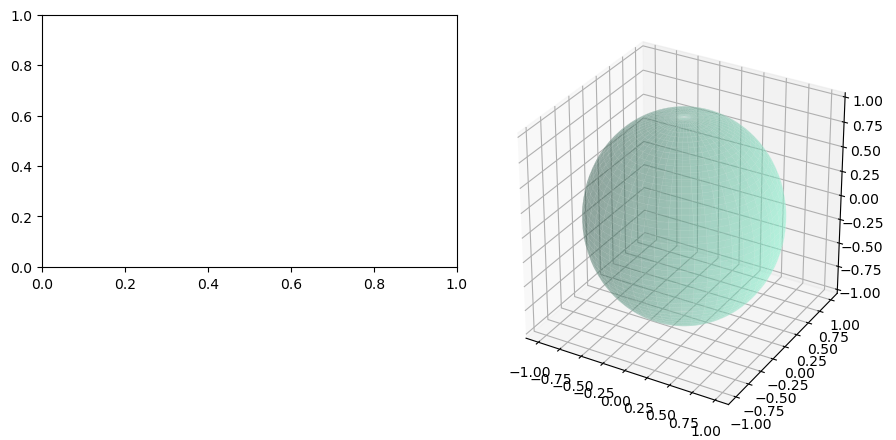

In [11]:
import imageio

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import scipy.stats
import os
import matplotlib
from mpl_toolkits.mplot3d import axes3d, Axes3D
import random

# geometric figure
# Create a new figure
fig = plt.figure(figsize = (12.0, 6.0), dpi = 100)
ax2 = plt.subplot2grid((20, 11), (2, 5), rowspan = 18, colspan = 5, projection = "3d")
ax1 = plt.subplot2grid((20, 11), (2, 0), rowspan = 11, colspan = 5)
# Get the current axes, and tell Matplotlib to use the 3D projection

# Set the scaling factor for the sphere
scale = 1.0

# Create a sphere
r = 1 # radius
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x_sphere = r * np.sin(phi_sphere) * np.cos(theta_sphere)
y_sphere = r * np.sin(phi_sphere) * np.sin(theta_sphere)
z_sphere = r * np.cos(phi_sphere)

# Plot the sphere
ax2.plot_surface(x_sphere, y_sphere, z_sphere, alpha = 0.3, color = "aquamarine", edgecolor = "w", linewidth = 0.1)

# initial parameter setting
inc_ini = np.radians(90)
# HS1
theta_ini = np.radians(70)
phi_ini = np.radians(20)
m_ini = 1
ang_sub_ini = np.radians(5)

# N_sub_ini = 5

#############################################################################################
# functions
# Newton
# def mu(x, inc, theta, phi, m):
#     pi_times_2 = 2. * math.pi
#     y = np.sin(theta) * np.sin(i) * np.cos(pi_times_2 * x - phi) + np.cos(theta) * np.cos(inc)
#     F = m * y
#     result = (abs(F) + F) / 2
#     return result
def mu(x, inc, theta, phi, m):
    pi_times_2 = 2. * math.pi
    y = np.sin(theta) * np.sin(inc) * np.cos(pi_times_2 * (x - phi)) + np.cos(theta) * np.cos(inc)
    F = m * y
    result = (abs(F) + F) / 2
    return result

def rectangular_to_polar_theta(z):
    theta_polar = np.arccos(z / (r * scale))
    return theta_polar

def rectangular_to_polar_phi(x, y):
    phi_polar = np.arctan2(y, x)
    if phi_polar < 0:
        phi_polar += 2 * np.pi
    return phi_polar

def polar_to_rectangular_x(theta, phi):
    x_rectangular = scale * r * np.sin(theta) * np.cos(phi)
    return x_rectangular

def polar_to_rectangular_y(theta, phi):
    y_rectangular = scale * r * np.sin(theta) * np.sin(phi)
    return y_rectangular

def polar_to_rectangular_z(theta):
    z_rectangular = scale * r * np.cos(theta)
    return z_rectangular

def rotation_matrix(theta, phi, x, y, z):
    xyz = np.array([[x], [y], [z]])
    z_rot = np.array([[np.cos(-phi), np.sin(-phi), 0], [-np.sin(-phi), np.cos(-phi), 0], [0, 0 ,1]])
    y_rot = np.array([[np.cos(-theta), 0, -np.sin(-theta)], [0, 1, 0], [np.sin(-theta), 0, np.cos(-theta)]])
    XYZ_after_rotation = np.dot(z_rot, np.dot(y_rot, xyz))
    return XYZ_after_rotation

def sub_hot_spot_hs(N_sub, ang, theta, phi):
    delta_phi = 360 / N_sub
    temp_phi = 0
    x_hs_sub = np.empty(0)
    y_hs_sub = np.empty(0)
    z_hs_sub = np.empty(0)
    for i in range(0, N_sub):
        x_hs_sub = np.append(x_hs_sub, polar_to_rectangular_x(ang, np.radians(temp_phi)))
        y_hs_sub = np.append(y_hs_sub, polar_to_rectangular_y(ang, np.radians(temp_phi)))
        z_hs_sub = np.append(z_hs_sub, polar_to_rectangular_z(ang))
        temp_phi += delta_phi
    hs_sub_XYZ = np.empty((3, 0))
    for i in range(0, N_sub):
        hs_sub_XYZ = np.append(hs_sub_XYZ, rotation_matrix(theta, phi, x_hs_sub[i], y_hs_sub[i], z_hs_sub[i]), axis = 1)
    hs_sub_theta = np.empty(0)
    hs_sub_phi = np.empty(0)
    for i in range(0, N_sub):
        hs_sub_theta = np.append(hs_sub_theta, rectangular_to_polar_theta(hs_sub_XYZ[2, i]))
        hs_sub_phi = np.append(hs_sub_phi, rectangular_to_polar_phi(hs_sub_XYZ[1, i], hs_sub_XYZ[0, i]))
    return hs_sub_XYZ, hs_sub_theta, hs_sub_phi

#############################################################################################

def HS(x, inc, theta, phi, m, ang_sub):
    # HS sub
    hs_sub_XYZ_final, hs_sub_theta_final, hs_sub_phi_final = sub_hot_spot_hs(N_sub_ini, ang_sub, theta, phi)
    HS = mu(x, inc, theta, phi, m)
    for i in range(0, N_sub_ini):
        HS += mu(x, inc, hs_sub_theta_final[i], hs_sub_phi_final[i], m)
    return HS

#############################################################################################

def drawing_sub_hs(a111, b111, c111, d111):
    x_draw = np.empty(0)
    y_draw = np.empty(0)
    z_draw = np.empty(0)
    for i in range(0, b111):
        x_draw = np.append(x_draw, polar_to_rectangular_x(a111, np.radians(i * 360 / b111)))
        y_draw = np.append(y_draw, polar_to_rectangular_y(a111, np.radians(i * 360 / b111)))
        z_draw = np.append(z_draw, polar_to_rectangular_z(a111))
    hs_sub_draw = np.empty((3, 0))
    for i in range(0, b111):
        hs_sub_draw = np.append(hs_sub_draw, rotation_matrix(c111, d111, x_draw[i], y_draw[i], z_draw[i]), axis = 1)
    return hs_sub_draw

#############################################################################################


# Create a directory to store the images
os.makedirs("images", exist_ok=True)

# Loop through different values of N_sub_ini
for N_sub_ini in range(1, 21):
    fig = plt.figure(figsize=(12.0, 6.0), dpi=100)
    ax2 = plt.subplot2grid((20, 11), (2, 5), rowspan=18, colspan=5, projection="3d")
    ax1 = plt.subplot2grid((20, 11), (2, 0), rowspan=11, colspan=5)

    hs_sub_draw_global = drawing_sub_hs(ang_sub_ini, N_sub_ini, theta_ini, phi_ini)


    x_hs = scale * r * np.sin(theta_ini) * np.cos(phi_ini)
    y_hs = scale * r * np.sin(theta_ini) * np.sin(phi_ini)
    z_hs = scale * r * np.cos(theta_ini)

    ax2.scatter(x_hs, y_hs, z_hs, s = 5, c = "blue")

    for i in range(0, N_sub_ini):
        ax2.scatter(hs_sub_draw_global[0, i], hs_sub_draw_global[1, i], hs_sub_draw_global[2, i], zorder = 3, s = 5, c = "blue")

    x_linspace = np.linspace(0, 2, 100)

    # initial parameter setting

    hs_sub_XYZ_global, hs_sub_theta_global, hs_sub_phi_global = sub_hot_spot_hs(N_sub_ini, ang_sub_ini, theta_ini, phi_ini)


    count_rates = HS(x_linspace, inc_ini, theta_ini, phi_ini, m_ini, ang_sub_ini)

    ax1.plot(x_linspace, count_rates, label = "newton", linestyle = '--', color = "blue")
    ax1.set_xlim(0, 2)
    ax1.set_xlabel('Phase')
    ax1.set_ylabel('Counts/sec')
    ax1.legend(bbox_to_anchor = (1.15, 1), loc = "upper right")
    ax1.set_title("test plot")

    ax2.set_xlim(-1.1, 1.1)
    ax2.set_ylim(-1.1, 1.1)
    ax2.set_zlim(-1.1, 1.1)
    ax2.view_init(elev = 90 - np.degrees(inc_ini), azim = 0)
    ax2.axis("off")

    # Save the figure as an image
    plt.savefig(f"images/plot_{N_sub_ini:02d}.png")
    plt.close(fig)  # Close the figure to free up memory

# Create a GIF from the saved images
images = []
for i in range(1, 21):
    images.append(imageio.imread(f"images/plot_{i:02d}.png"))
imageio.mimsave("plots.gif", images, duration=200)